## Demonstration of Clustering Analysis
Let's proceed with the clustering case study using the "penguins" dataset. We'll demonstrate four types of clustering methods: 1) partitioning methods, 2) hierarchical methods, and 3) density-based methods. we will visualize the clustering results and compare them using the Silhouette Score.

## Setup
Load and Explore the "Penguins" Dataset

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the "penguins" dataset from Seaborn
penguins = sns.load_dataset('penguins')

# Explore the basic information about the dataset
print(penguins.head())
print(penguins.info())
print(penguins.describe())

# Drop rows with missing values
penguins = penguins.dropna()

GT = penguins.species

# Convert categorical variables to numerical representations using one-hot encoding
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)

# Extract the feature columns for clustering
X = penguins.drop('species_Chinstrap', axis=1)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_

In [27]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Gentoo,island_Dream,island_Torgersen,sex_Male
0,39.1,18.7,181.0,3750.0,False,False,True,True
1,39.5,17.4,186.0,3800.0,False,False,True,False
2,40.3,18.0,195.0,3250.0,False,False,True,False
4,36.7,19.3,193.0,3450.0,False,False,True,False
5,39.3,20.6,190.0,3650.0,False,False,True,True
...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False,False,False
340,46.8,14.3,215.0,4850.0,True,False,False,False
341,50.4,15.7,222.0,5750.0,True,False,False,True
342,45.2,14.8,212.0,5200.0,True,False,False,False


In [25]:
X.shape

(333, 8)

## Clustering with Partitioning Methods (e.g., K-means)

C:\Users\Sandipan.Dey\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


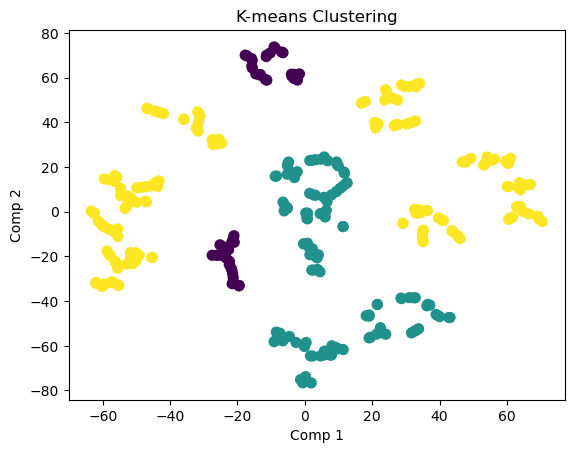

Silhouette Score (K-means): 0.4655


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

X = penguins.drop('species_Chinstrap', axis=1)
X = StandardScaler().fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)

# Visualize K-means clustering results
#plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=kmeans_labels, cmap='viridis', s=50)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-means Clustering')
#plt.xlabel('Bill Length (mm)')
#plt.ylabel('Bill Depth (mm)')
plt.xlabel('Comp 1')
plt.ylabel('Comp 2')
plt.show()

# Calculate the Silhouette Score for K-means clustering
silhouette_score_kmeans = silhouette_score(X, kmeans_labels)
print(f"Silhouette Score (K-means): {silhouette_score_kmeans:.4f}")


In [28]:
from collections import Counter
Counter(GT)

Counter({'Adelie': 146, 'Chinstrap': 68, 'Gentoo': 119})

In [29]:
Counter(kmeans_labels)

Counter({0: 47, 2: 167, 1: 119})

In [30]:
label2name = {0: 'Chinstrap', 2:'Adelie', 1:'Gentoo'}
kmeans_label_names = list(map(lambda x:label2name[x], kmeans_labels))

In [32]:
#GT, kmeans_labels
#len(GT), len(kmeans_labels)
np.mean(GT == kmeans_label_names)

0.6546546546546547

## Clustering with Hierarchical Methods (e.g., Agglomerative Clustering)

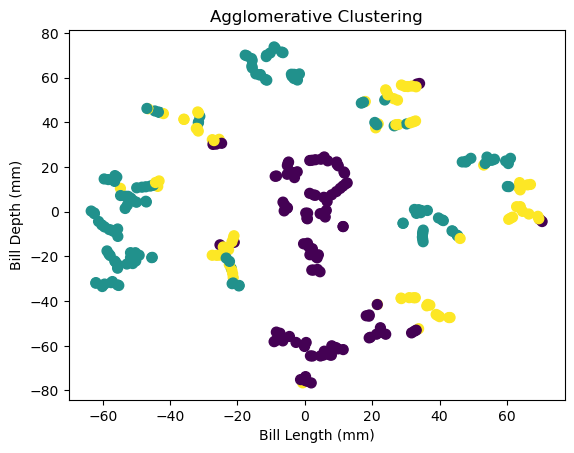

Silhouette Score (Agglomerative Clustering): 0.5164


In [37]:
from sklearn.cluster import AgglomerativeClustering

# Perform Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=3)
agglomerative_labels = agglomerative.fit_predict(X)

# Visualize Agglomerative Clustering results
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=agglomerative_labels, cmap='viridis', s=50)
#plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=agglomerative_labels, cmap='viridis', s=50)
plt.title('Agglomerative Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for Agglomerative Clustering
silhouette_score_agglomerative = silhouette_score(X, agglomerative_labels)
print(f"Silhouette Score (Agglomerative Clustering): {silhouette_score_agglomerative:.4f}")


In [38]:
Counter(agglomerative_labels)

Counter({1: 138, 0: 112, 2: 83})

In [39]:
label2name = {2: 'Chinstrap', 1:'Adelie', 0:'Gentoo'}
agglomerative_label_names = list(map(lambda x:label2name[x], agglomerative_labels))
np.mean(GT == agglomerative_label_names)

0.6516516516516516

## Clustering with Density-Based Methods (e.g., DBSCAN)

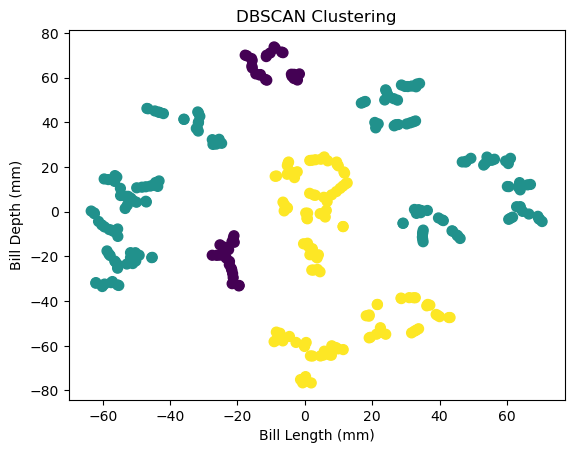

Silhouette Score (DBSCAN): 0.4655


In [73]:
from sklearn.cluster import DBSCAN

X = penguins.drop('species_Chinstrap', axis=1)
X = StandardScaler().fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=2.5, min_samples=2) # eps=20
dbscan_labels = dbscan.fit_predict(X)

# Visualize DBSCAN clustering results
#plt.scatter(X['bill_length_mm'], X['bill_depth_mm'], c=dbscan_labels, cmap='viridis', s=50)
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.show()

# Calculate the Silhouette Score for DBSCAN clustering
silhouette_score_dbscan = silhouette_score(X, dbscan_labels)
print(f"Silhouette Score (DBSCAN): {silhouette_score_dbscan:.4f}")

In [75]:
#dbscan_labels
Counter(dbscan_labels)

Counter({0: 47, 1: 167, 2: 119})

In [76]:
label2name = {0: 'Chinstrap', 1:'Adelie', 2:'Gentoo'}
dbscan_label_names = list(map(lambda x:label2name[x], dbscan_labels))
np.mean(GT == dbscan_label_names)

0.6546546546546547

## Compare the Results and Conclusion

In [77]:
# Compare the Silhouette Scores
silhouette_scores = [silhouette_score_kmeans, silhouette_score_agglomerative, silhouette_score_dbscan]
method_names = ['K-means', 'Agglomerative', 'DBSCAN']

for i, score in enumerate(silhouette_scores):
    print(f"Silhouette Score ({method_names[i]}): {score:.4f}")

# Summarize and compare the clustering results
# You can summarize and compare the clustering results based on the visualization and silhouette scores obtained from each method.
# Discuss the strengths and limitations of each clustering method in the context of the "penguins" dataset.

# Conclusion
# Summarize the findings and insights gained from the case study, and discuss potential applications or future work.


Silhouette Score (K-means): 0.4655
Silhouette Score (Agglomerative): 0.5164
Silhouette Score (DBSCAN): 0.4655
